## Estadistica aplicada

Sesion 6 - 23 agosto 

Ana Sofia Saucedo Garcia 1946646

Grupo 042

In [16]:
# Librerias (basicas) 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 

# Libreria especializada 

import statsmodels.formula.api as smf 

In [17]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
datos = pd.read_excel('modelolineal.xlsx')

In [19]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
datos

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21
5,6,24.436799,22
6,7,14.507928,19
7,8,16.013496,14
8,9,12.043514,3
9,10,6.808838,1


In [21]:
datos = datos[['X','Y']]

In [22]:
datos

,X,Y
0,23,19.246957
1,19,16.878501
2,27,20.187237
3,13,12.176789
4,21,21.420112
5,22,24.436799
6,19,14.507928
7,14,16.013496
8,3,12.043514
9,1,6.808838


## Repaso breve MCO

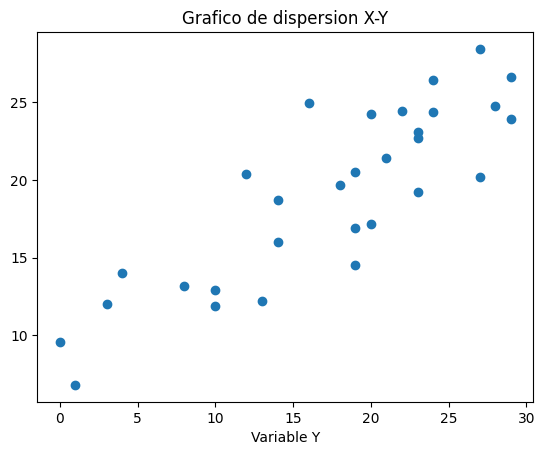

In [23]:
plt.scatter(datos['X'],datos['Y'])
plt.title('Grafico de dispersion X-Y')
plt.xlabel('Variable X')
plt.xlabel('Variable Y')
plt.show()

De acuerdo con la grafica hay relacion lineal entre X y Y , es pausible estimar un modelo lineal de MCO 

In [24]:
## Estimar el modelo 
## Definir el modelo 
reg = smf.ols(formula= 'Y ~ X',data= datos)
## Estimar el modelo 

results = reg.fit()

## Pedir que nos muestre el modelo

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        16:15:48   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

Intercepto : p-value < alpha con 95% rechazamos H_0 ; significa que el intervalo es ditinto de 0 ; estimamos un valor 8.96 

B1: p-value < alpha con 95% rechazamos H_0 ; signfica que 'X' afecta 'Y'
En promedio , caundo 'X' incrementa en una unidad 'Y' incrementa 0.58

In [25]:
## Conjunto de entrenamiento 

train_set= datos.iloc[:20]

## Conjunto de evaluacion

test_set= datos.iloc[20:] 

In [34]:
## la regresion se estima con el conjunto de entrenamiento (train set)

reg1= smf.ols(formula ='Y ~ X',data= train_set)
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     28.80
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           4.23e-05
Time:                        16:22:40   Log-Likelihood:                -51.332
No. Observations:                  20   AIC:                             106.7
Df Residuals:                      18   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2336      2.008      4.598      0.0

In [35]:
## pronosticar los valores del conjunto de evaluacion 

test_set['Y_hat']= results1.predict(test_set)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11068\1459902120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat']= results1.predict(test_set)


In [36]:
test_set

,X,Y,Y_hat
20,0,9.544102,9.233587
21,20,24.230330,20.117395
22,24,26.417826,22.294157
23,23,23.066723,21.749966
24,8,13.145005,13.587110
25,24,24.385156,22.294157
26,10,12.934102,14.675491
27,4,14.002469,11.410349
28,29,26.599047,25.015109
29,10,11.910387,14.675491


In [37]:
# Utilizar mad para evaluar que tan bien pronostica el modelo el conjunto de evaluacion

MAD =( test_set['Y']-test_set['Y_hat']).abs().mean()

In [38]:
MAD

2.107953156470991